<a href="https://colab.research.google.com/github/VELETIVIJAYCHANDRA/Projects/blob/main/ELECTRIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
DATA=pd.read_csv('/content/drive/MyDrive/Data_for_UCI_named.csv', delimiter = ',')
DATA

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [2]:
print(DATA.shape)
DATA[0:]
DATA.columns

(10000, 14)


Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [3]:
input=np.zeros((10000,13))

**INPUT AND OUTPUT**

In [4]:
input[0:,0]=DATA['tau1']
input[:,1]=DATA['tau2']
input[:,2]=DATA['tau3']
input[:,3]=DATA['tau4']
input[:,4]=DATA['p1']
input[:,5]=DATA['p2']
input[:,6]=DATA['p3']
input[:,7]=DATA['p4']
input[:,8]=DATA['g1']
input[:,9]=DATA['g2']
input[:,10]=DATA['g3']
input[:,11]=DATA['g4']
input[:,12]=DATA['stab']

In [5]:
output=np.zeros((10000,0))

In [6]:
output=DATA['stabf']

In [7]:
train=input[0:7000]

In [8]:
test=input[7000:10000]

Training the Decision tree...
1.0


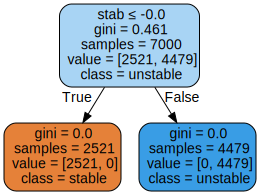

In [9]:
classNames=np.array(['stable','unstable'])
featureNames=np.array(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2','g3', 'g4', 'stab'])
print( "Training the Decision tree...")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train, output[0:7000])
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("train")
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=featureNames,
                         class_names=classNames,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
print(clf.score(test, output[7000:10000]))
graph

In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(train,output[0:7000])
clf.score(test, output[7000:10000])

0.7336666666666667

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(train, output[0:7000])

clf.score(test, output[7000:10000])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.904